In [87]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy.io.wavfile as wavutils



In [97]:

"""Utils function related to signals for S3"""

def sigin(wavname:str)->[int,np.array]:
    """Functions that reads wave file and return sample rate and singal as np.array"""
    return wavutils.read(wavname,mmap=False)

def sawtooth(fs: int,Ns:int,Ss:int)->np.array:
    """Returns a Sawtooth wave of Sample rate Ss with Ns number of samples and Sample Frequency Fs"""
    Ss=np.linspace(0,1,Ss)
    return sp.signal.sawtooth(2 * np.pi * fs * Ss)[0:Ns]

def triangle(fs:int,Ns:int,Ss:int)->np.array:
    """Returns a Triangle wave of Sample rate Ss with Ns number of samples and Sample Frequency Fs"""
    Ss=np.linspace(0,1,Ss)
    return sp.signal.sawtooth(2 * np.pi * fs * Ss,0.5)[0:Ns]

def sin(fs:int,Ns:int,Ss:int)->np.array:
    """Returns a Sine wave of Sample rate Ss with Ns number of samples and Sample Frequency Fs"""
    t=np.arange(Ns)
    omega=2*np.pi*fs/Ss
    return np.sin(omega*t)

def cos(fs:int,Ns:int,Ss:int)->np.array:
    """Returns a Cosine wave of Sample rate Ss with Ns number of samples and Sample Frequency Fs"""
    t=np.arange(Ns)
    omega=2*np.pi*fs/Ss
    return np.cos(omega*t)


In [98]:
def create_FunctionFrame(fs:int,Ns:int,Ss:int)->pd.DataFrame:
    """Takes Sampling Frequency and returns a Data frame with function vectors of frequencies"""
    FuncFrame=pd.DataFrame()
    # Made a dictionary with key as func name and value ad function object
    Functions={"sin":sin,"cos":cos,"triangle":triangle,"sawtooth":sawtooth}

    #Iterated on dictionary items
    for i in Functions.items():
        for j in range(10):
            FuncFrame[i[0]+str(j)]=i[1](j*fs,Ns,Ss)

    return FuncFrame


In [99]:
create_FunctionFrame(1008,100,44100).head()

,sin0,sin1,sin2,sin3,sin4,sin5,sin6,sin7,sin8,sin9,...,sawtooth0,sawtooth1,sawtooth2,sawtooth3,sawtooth4,sawtooth5,sawtooth6,sawtooth7,sawtooth8,sawtooth9
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,0.0,0.143122,0.283298,0.417641,0.543384,0.657939,0.758947,0.844328,0.912324,0.961536,...,-1.0,-0.954285,-0.908569,-0.862854,-0.817139,-0.771423,-0.725708,-0.679993,-0.634277,-0.588562
2,0.0,0.283298,0.543384,0.758947,0.912324,0.990950,0.988380,0.904827,0.747136,0.528227,...,-1.0,-0.908569,-0.817139,-0.725708,-0.634277,-0.542847,-0.451416,-0.359985,-0.268555,-0.177124
3,0.0,0.417641,0.758947,0.961536,0.988380,0.834573,0.528227,0.125333,-0.300468,-0.671351,...,-1.0,-0.862854,-0.725708,-0.588562,-0.451416,-0.314270,-0.177124,-0.039978,0.097168,0.234314
4,0.0,0.543384,0.912324,0.988380,0.747136,0.266037,-0.300468,-0.770513,-0.993200,-0.897038,...,-1.0,-0.817139,-0.634277,-0.451416,-0.268555,-0.085694,0.097168,0.280029,0.462890,0.645752


In [2]:

import numpy as np
import sounddevice as sd
import time

# Samples per second
sps = 44100

# Frequency / pitch
freq_hz = 440.0

# Duration
duration_s = 5.0

# Attenuation so the sound is reasonable
atten = 0.3

# NumpPy magic to calculate the waveform
each_sample_number = np.arange(duration_s * sps)
waveform = np.sin(2 * np.pi * each_sample_number * freq_hz / sps)
waveform_quiet = waveform * atten

# Play the waveform out the speakers
sd.play(waveform_quiet, sps)
time.sleep(duration_s)
sd.stop()

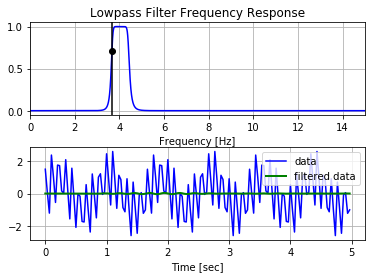

In [11]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    #change band to low to make a lowpass filter and change (normal_cutoff,..) to normal_cutoff
    #change low to high to make  a higpass filter
    #lowpass and highpass take wn as single value however bandpass takes tuple
    b, a = butter(order, (normal_cutoff,normal_cutoff+0.05), btype='band', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()